ICS483- Project team 8

In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print (tf.__version__)
from keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split


2.8.0


# Loading the Data

In [2]:
# you should download the dataset and name and Data.zip
!unzip Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [3]:
# This fuction is used to read the data set from multiple folders and assign their labels as the folder name:
def read_dataset(path):
   images=[]
   labels=[]
   for dirl in os.listdir(path):
       for file in os.listdir(os.path.join(path,dirl)):
              img_path=os.path.join(path,dirl,file)
              image=cv2.imread(img_path)
              images.append(image)
              labels.append(dirl)
   return images,labels

Creating ImageDataGenerator to improve the speed of the training with Keras

In [4]:
Data_Generator = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0, 
                                   zoom_range = 0, 
                                   horizontal_flip = True, 
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

In [5]:
training_Data = Data_Generator.flow_from_directory('/content/train', 
                                                 target_size = (32,32), 
                                                 batch_size = 16, 
                                                 color_mode = 'grayscale' , 
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [6]:
test_DataGenerator= ImageDataGenerator(rescale = 1./255) 

In [7]:
test_data = test_DataGenerator.flow_from_directory('/content/test', 
                                             target_size = (32,32), 
                                             batch_size = 16, 
                                             color_mode = 'grayscale', 
                                             class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [8]:
x_train, y_train = read_dataset('/content/train')
x_test, y_test = read_dataset('/content/test')

#creating a validation set by splitting the test set
TEST_SIZE = 0.5
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=TEST_SIZE, random_state=777)

**Some statistics of the Training set**

The training set contains 28709 images

Training data set distribution:
{'angry': 3995, 'disgusted': 436, 'fearful': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprised': 3171}


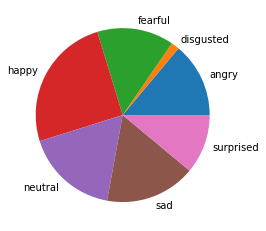

In [9]:
print('The training set contains {} images'.format(len(x_train)))

label_name, label_counts = np.unique(y_train, return_counts=True)
print("\nTraining data set distribution:")
print(dict(zip(label_name, label_counts)))

#Creating the Pie chart
plt.pie(label_counts, labels = label_name)
plt.show() 

**Some statistics of the Validation set**

The validation set contains 3589 images

Validation data set distribution:
{'angry': 479, 'disgusted': 61, 'fearful': 523, 'happy': 915, 'neutral': 581, 'sad': 612, 'surprised': 418}


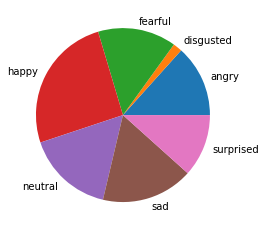

In [10]:
print('The validation set contains {} images'.format(len(x_val)))

label_name, label_counts = np.unique(y_val, return_counts=True)

print("\nValidation data set distribution:")
print(dict(zip(label_name, label_counts)))

#Creating the Pie chart
plt.pie(label_counts, labels = label_name)
plt.show() 


**Some statistics of the Testing set**

The Testing set contains 3589 images

Test data set distribution:
{'angry': 479, 'disgusted': 50, 'fearful': 501, 'happy': 859, 'neutral': 652, 'sad': 635, 'surprised': 413}


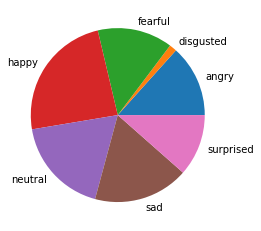

In [11]:
print('The Testing set contains {} images'.format(len(x_test)))

label_name, label_counts = np.unique(y_test, return_counts=True)
print("\nTest data set distribution:")
print(dict(zip(label_name, label_counts)))

#Creating the Pie chart
plt.pie(label_counts, labels = label_name)
plt.show() 

In [12]:
def displayImage(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

**Image Inhancement**

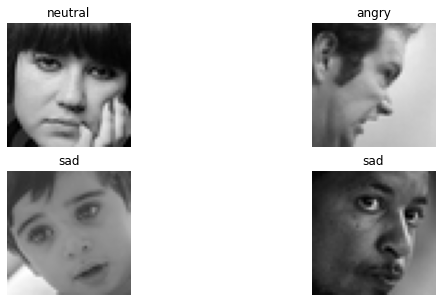

In [13]:
def display_random_images():
  fig = plt.figure(figsize=(10, 5))
  rows = 2
  columns = 2
  img_indexes = []

  for i in range(4):
    img_indexes.append(random.randint(0, len(x_train)-1))

  fig.add_subplot(rows, columns, 1)
  
  plt.imshow(x_train[img_indexes[0]])
  plt.axis('off')
  plt.title(y_train[img_indexes[0]])
  
  fig.add_subplot(rows, columns, 2)
  
  plt.imshow(x_train[img_indexes[1]])
  plt.axis('off')
  plt.title(y_train[img_indexes[1]])
  
  fig.add_subplot(rows, columns, 3)
  plt.imshow(x_train[img_indexes[2]])
  plt.axis('off')
  plt.title(y_train[img_indexes[2]])
  
  fig.add_subplot(rows, columns, 4)
  
  plt.imshow(x_train[img_indexes[3]])
  plt.axis('off')
  plt.title(y_train[img_indexes[3]])

display_random_images()

In [14]:
# Flatten the images to feed it into the LogisticRegression Model
x_train_flat = np.array(x_train,dtype=object).reshape(28709,3*48*48)
x_val_flat = np.array(x_val,dtype=object).reshape(3589,3*48*48)
x_test_flat = np.array(x_test,dtype=object).reshape(3589,3*48*48)

**Building KNN model for Raw data**

Test Accuracy: 0.34299247701309554
Precision: 0.37228481396369106
Recall: 0.34299247701309554
F1: 0.3437312616976383


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


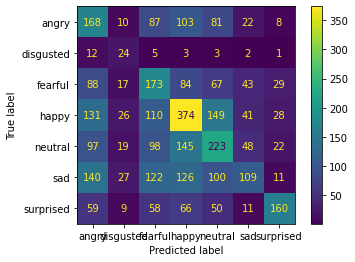

In [15]:
# After Hyperparaeter tuning we found that the best k is equlal to 1
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat, y_train)
test_y_pred= knn.predict(x_test_flat)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(knn, x_test_flat, y_test)  
plt.show()

**Building SVM model for Raw data**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Accuracy: 0.35859570911117306
Precision: 0.3250399596789321
Recall: 0.35859570911117306
F1: 0.3270013190323052


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


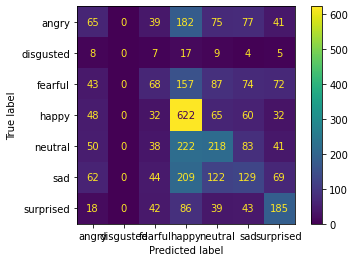

In [16]:
svm = LogisticRegression(random_state=777)
svm.fit(x_train_flat,y_train)

test_y_pred= svm.predict(x_test_flat)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(svm, x_test_flat, y_test)  
plt.show()

Extract Statistical Features

In [17]:
from skimage.feature import hog
from skimage import exposure

def extract_features(array_images):
  features = []
  for img in array_images:
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)    
    hog_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    features.append(hog_rescaled)
  return features

In [ ]:
x_train_features = np.array(extract_features(x_train),dtype=object)
x_val_features = np.array(extract_features(x_val),dtype=object)
x_test_features = np.array(extract_features(x_test),dtype=object)

In [ ]:
# Flatten the images to feed the Models
x_train_features = np.array(x_train_features,dtype=object).reshape(28709,48*48)
x_val_features = np.array(x_val_features,dtype=object).reshape(3589,48*48)
x_test_features = np.array(x_test_features,dtype=object).reshape(3589,48*48)

**Building KNN model for Statistical Features**

Test Accuracy: 0.3884090275842853
Precision: 0.41394315469117793
Recall: 0.3884090275842853
F1: 0.3830182403447923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


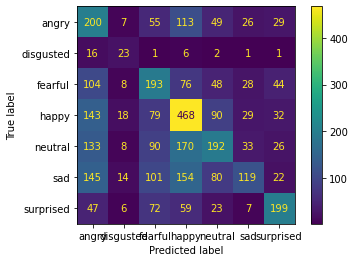

In [ ]:
# After Hyperparaeter tuning we found that the best k is equlal to 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_features, y_train)
test_y_pred= knn.predict(x_test_features)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(knn, x_test_features, y_test)  
plt.show()

**Building SVM model for Statistical Features**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Accuracy: 0.3722485371969908
Precision: 0.35312297544370613
Recall: 0.3722485371969908
F1: 0.34649851122664294


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


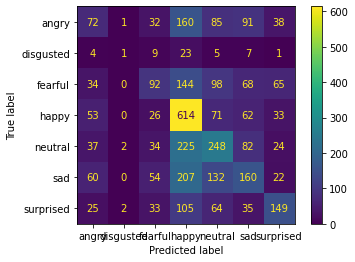

In [ ]:
svm = LogisticRegression(random_state=777)
svm.fit(x_train_features,y_train)

test_y_pred= svm.predict(x_test_features)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(svm, x_test_features, y_test)  
plt.show()

# Building a CNN model

In [ ]:
cnn = tf.keras.models.Sequential() 

cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 2, activation = 'relu',input_shape = [32,32,1]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation = 'relu',input_shape = [32,32,1]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 7, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 16)        80        
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       1

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
output = cnn.fit(x = training_Data, validation_data = test_data, epochs = 30)

   5/1795 [..............................] - ETA: 27s - loss: 1.4791 - accuracy: 0.4875

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1795/1795 [==============================] - 34s 19ms/step - loss: 1.4866 - accuracy: 0.4301 - val_loss: 1.3890 - val_accuracy: 0.4773


113/113 - 3s - loss: 1.3784 - accuracy: 0.4780 - 3s/epoch - 28ms/step


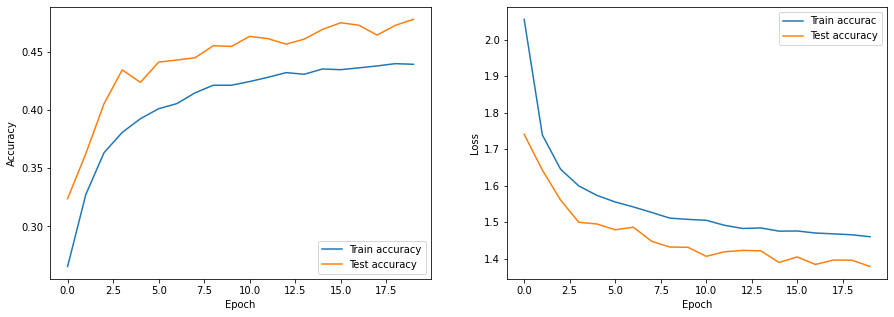

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(output.history['accuracy'], label='accuracy')
plt.plot(output.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy','Test accuracy'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(output.history['loss'], label='loss')
plt.plot(output.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train accurac','Test accuracy'], loc='upper right')

test_loss, test_acc = cnn.evaluate(test_data, verbose=2)